## **Heart-disease-prediction**



Heart disease is a debilitating disease that affect many people around the world. Heart disease is an umbrella term that consists of other conditions that produce diseased vessels, structural problems and blood clots within heart structure. The symptoms of heart disease vary depending on the type of condition afflicting the patient. Each year heart disease is the leading cause of death in both men and women, affecting about 370,000 people.



**This project is to just show some of the steps that could be taken analyzing a dataset using the heart disease dataset.**

## **Steps:**
- Importing Libraries
- Uploading  dataset
- Analyze dataset 
- Building model
- Training model and validating model

- Conclusion

In [56]:
# These are the libraray which will be used in solution you can use any other libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from pandas import set_option

from keras.models import Sequential
from keras.layers import Dense


ModuleNotFoundError: No module named 'keras'

## **Uploading dataset**

The dataset that we will be using is a dataset from the UCI Machine Learning repository via a Kaggle competition. The data has been provided by the Cleveland Clinic Foundation. The dataset consists of patients ranging in age from 29 - 77 years old. There are a total of 303 instances and 14 attributes including our target variable of “presence” of heart disease. 

**Attributes**


1.   sex:     sex (1 = male; 0 = female)
2.   age:     age in years
3.   cp :     chest pain type
4.   trestb:  psresting blood pressure (in mm Hg on admission to the hospital)
5.   chol:    serum cholestoral in mg/dl
6.   fbs:     (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7.   restecg: resting electrocardiographic results
8.   thalach: maximum heart rate achieved
9.   exang:   exercise induced angina (1 = yes; 0 = no)
10.  oldpeak: ST depression induced by exercise relative to rest
11.  slope:   The slope of the peak exercise ST segment
12.  ca:      Number of major vessels (0-3) colored by flourosopy
13.  thal:    3 = normal; 6 = fixed defect; 7 = reversable defect
14.  target:  1 or 0 (0: No Disease, 1: Disease)






In [57]:
data = pd.read_csv(r"D:\amol_lap_data\python_tutor\Jupyter\Projects\Heart-disease-prediction\heart.csv")

In [58]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [60]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No missing values found in dataser

## **Analyze data**

The dataset consists of patients ranging in age from 29 - 77 years old. There are a total of 303 instances and 14 attributes including our target variable. 




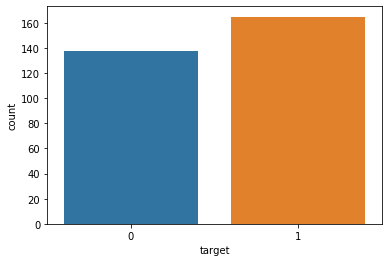

In [61]:
# plt.hist(data['target'])plt
y = data["target"]
sns.countplot(y)
# target = data.target.value_counts()
# print(target)


**Analyze dataset using histogram**

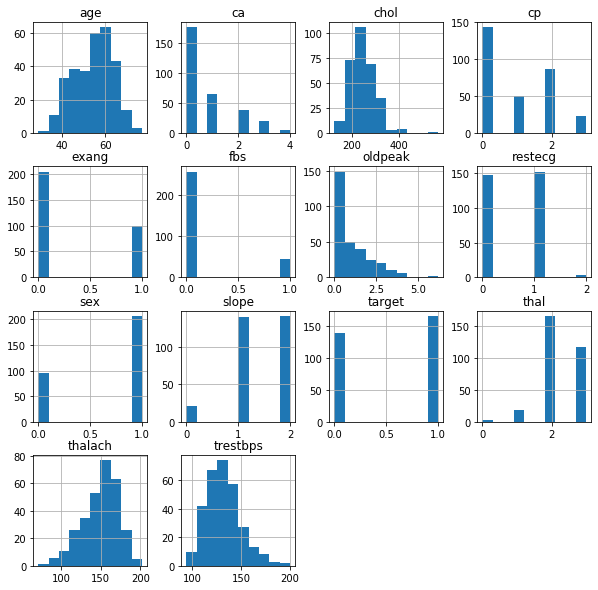

In [62]:
data.hist(figsize = (10,10))
plt.show()

**Analyze data using box plot**

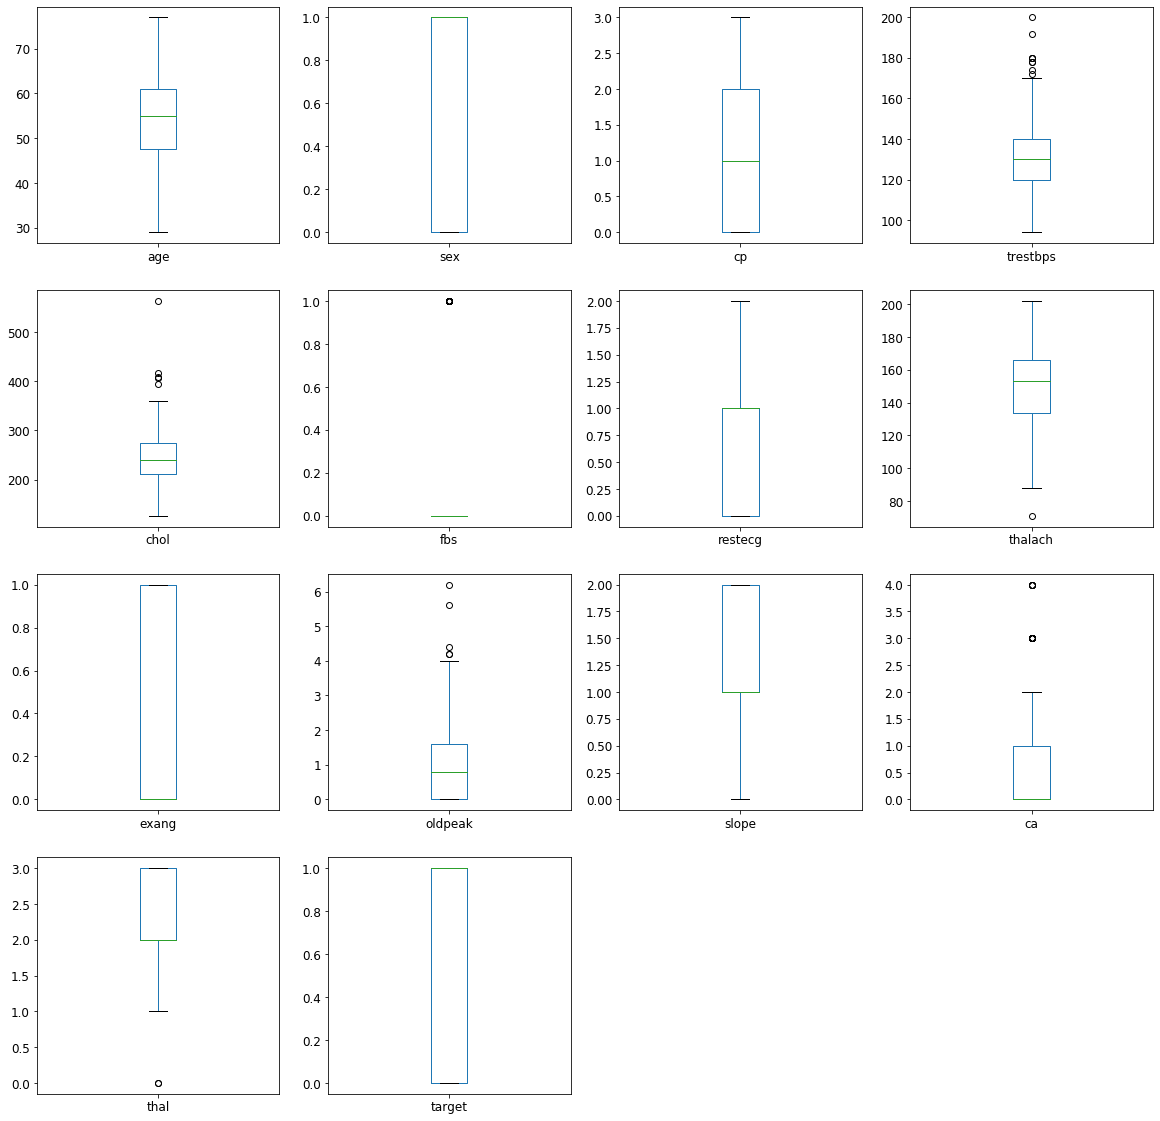

In [63]:
# cols = list(data.columns)
# print(cols)

# for col in cols:
#     colname = col + '_box'
#     print(colname)
# #      = data.boxplot(column = cols)

# # data.boxplot(column  = 'age')


data.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,20),fontsize=12)
plt.show()

**Analyze the Sex variable wrt target variable**

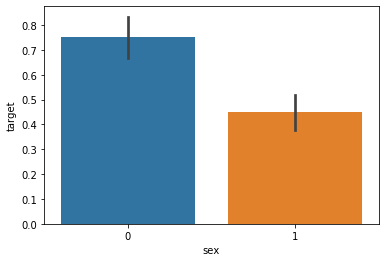

In [64]:
sns.barplot(data["sex"],data["target"])


We notice, that females are more likely to have heart problems than males

**Analyze slope feature  wrt target**

In [65]:
data['slope'].unique()

array([0, 2, 1], dtype=int64)

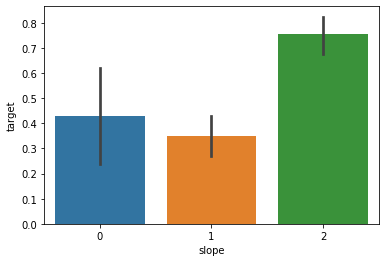

In [66]:
sns.barplot(data["slope"],data["target"])

We observe, that Slope '2' causes heart pain much more than Slope '0' and '1

**Analysing the 'ca' feature wrt target**

In [67]:
data['ca'].unique()

array([0, 2, 1, 3, 4], dtype=int64)

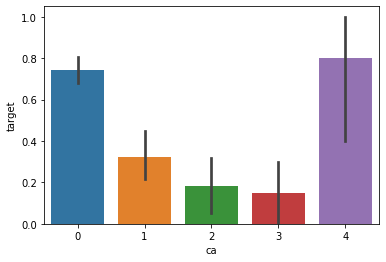

In [68]:
sns.barplot(data["ca"],data["target"])

ca=4 and ca=0 , has high  number of heart patients

**Corelation Matrices**

A much more common metric, and one directly calculable from the covariance, is the correlation.

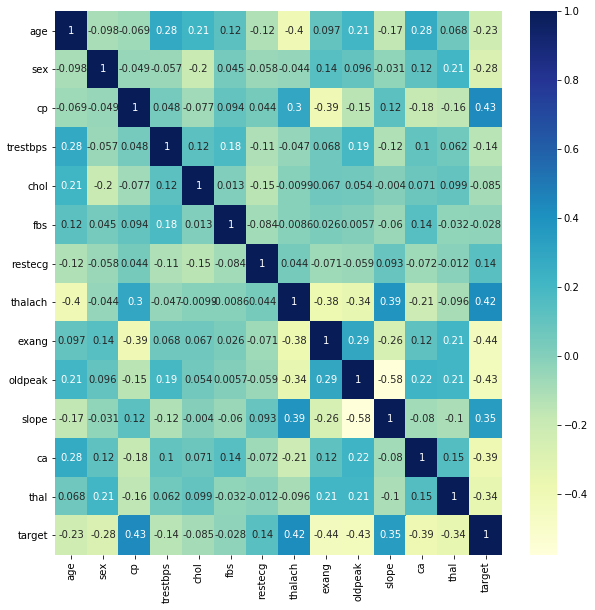

In [69]:
plt.subplots(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap="YlGnBu")

** cp, thalach and slope has high corelations with target

##**Building Model**

**Train-test split**

In [70]:
# Split data in train and test with test size equal to 20 percent of total
# Write your code here using train_test_split method with test size equal to 20 percent of total

x = data.drop('target',axis=1)
y = data['target']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20, random_state=0)

In [72]:
x_train.shape

(242, 13)

In [73]:
y_train.shape

(242,)

In [74]:
x_test.shape

(61, 13)

In [75]:
y_test.shape

(61,)

**K Nearest Neighbors**


In [77]:
#Build KNN model using Inbuilt classifier scikit learn

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)

**Neural Network**

In [0]:
# Build Neural network using keras with no of hidden layer equal to 7 and activation function as 'relu' and outer layer activation function as 'sigmoid'.

#Write your code here

# Write your code here to compile model with 'adam' optimizer

In [0]:
#Show the summary of the  Neural network  model
# Write your code here

##**Training and Validating Model**

**K Nearest Neighbours**

In [78]:
# Print Accuracy Score
score_knn = round(accuracy_score(y_test,y_pred_knn)*100,2)
print("The accuracy score achieved using KNN is: "+str(score_knn)+" %")

The accuracy score achieved using KNN is: 67.21 %


**Neural Network**

1.   We have used 250 epochs to train
2.   No of validating data = 20 percent of total

 *Note - You can change the value of epoch*

In [0]:
# Train your neural network with 250 epochs
# Write your code here

In [0]:
# Calculate the achieved accuracy 
# Write your code here

In [0]:
# Print the Accuracy achieved using Neural Network
#Write your code here

##**Conclusion**